In [4]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification
from sklearn import preprocessing
from timerun import time_code, time_func
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from multiprocessing import Pool
from parallel_methods import DSMethods

In [5]:
n_features = 500

# Load the madelon training dataset
train_data = pd.read_table("MADELON/madelon_train.data", sep=' ', header=None, usecols=range(0,500))
train_labels = pd.read_table("MADELON/madelon_train.labels", sep=' ', header=None)
X_train, X_test = np.split(preprocessing.scale(train_data.to_numpy()), [1600])
y_train, y_test = np.split(np.ravel(train_labels.to_numpy()), [1600])

data = DSMethods(n_features, X_train, y_train, X_test, y_test)

# Try CV on RFE

In [6]:
def plot_train_vs_test(train_scores, test_scores, points = {}, time = -1):
    if points != {}: plt.scatter(points.keys(), points.values(), marker='|', zorder = 3)
    plt.plot(train_scores.keys(), train_scores.values(), label = "Train", zorder = 2)
    plt.plot(test_scores.keys(), test_scores.values(), label = "Test", zorder = 1)
    plt.legend()
    plt.ylim([0.4,1.0])
    plt.axhline(0.5, color = "red", linewidth=1, linestyle="--")
    plt.show()

    maxarg = list(test_scores.keys())[np.argmax(list(test_scores.values()))]
    print("AT", maxarg, test_scores[maxarg], "WITH", len(points), "ITERATIONS IN", time, "SECONDS")

def mean_of_arrays(data):
    arr = {}
    for x in data[0]:
        arr[x] = np.mean([data[v][x] for v in data])
    return arr

In [10]:
def SVM_RFE_W_DSTEP_PLOT(percentage, CVal = 1, stop=1):
    kf = KFold(n_splits=20, shuffle=True)

    index = [(test_index, train_index, percentage, stop, CVal) for test_index, train_index in kf.split(data.X_train)]
    with Pool(7) as pool:
        scores = pool.map(data.svm_rfe_dynamic_step_only, index)
        scores= list(scores)

    # result = list(map(data.svm_rfe_dynamic_step_only, index))

    train_scores = mean_of_arrays({i: x[0] for i, x in enumerate(scores)})
    test_scores  = mean_of_arrays({i: x[1] for i, x in enumerate(scores)})
    points       = mean_of_arrays({i: x[2] for i, x in enumerate(scores)})
    time         = np.mean([x[3] for x in scores])

    maxarg = list(test_scores.keys())[np.argmax(list(test_scores.values()))]
    return test_scores[maxarg]

In [11]:
SVM_RFE_W_DSTEP_PLOT(0.3, 10)

0.6037500000000001

In [13]:
scores = {}
kf = KFold(n_splits=10, shuffle=True)
for i in range(-100, 400, 5):
    fold_scores = []
    CVal = 10**(i/100)
    scores[CVal] = SVM_RFE_W_DSTEP_PLOT(0.3, CVal)
    print(CVal, scores[CVal])

0.1 0.609375
0.11220184543019636 0.6075
0.12589254117941673 0.606875
0.14125375446227545 0.608125
0.15848931924611134 0.6081249999999999
0.1778279410038923 0.6025
0.19952623149688797 0.60625
0.22387211385683395 0.608125
0.251188643150958 0.6012500000000001
0.28183829312644537 0.6068749999999999
0.31622776601683794 0.6037499999999999
0.35481338923357547 0.604375
0.3981071705534972 0.6043749999999999
0.44668359215096315 0.6075
0.5011872336272722 0.601875
0.5623413251903491 0.6050000000000001
0.6309573444801932 0.608125
0.7079457843841379 0.6018749999999999
0.7943282347242815 0.605
0.8912509381337456 0.6006250000000001
1.0 0.6024999999999999
1.1220184543019633 0.6124999999999998
1.2589254117941673 0.6050000000000001
1.4125375446227544 0.6056250000000001
1.5848931924611136 0.6056250000000001
1.7782794100389228 0.603125
1.9952623149688795 0.6143750000000001
2.2387211385683394 0.60375
2.51188643150958 0.60625
2.8183829312644537 0.6043749999999999
3.1622776601683795 0.600625
3.548133892335755

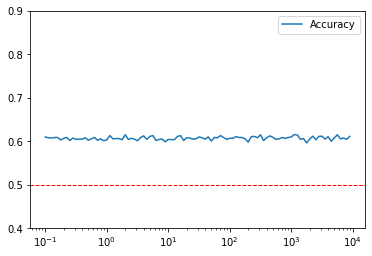

In [15]:
plt.plot(scores.keys(), [x for x in scores.values()], label = "Accuracy")
plt.legend()
plt.ylim([0.4,0.9])
plt.xscale('log')
plt.axhline(0.5, color = "red", linewidth=1, linestyle="--")
plt.show()